In [1]:
# ---
# title: "Financial Report"
# format:
#   html:
#     toc: true
#     code-fold: false
# execute:
#   echo: false      # hides all code by default - useful when producing in html format, so keeping here for now
#   warning: false
#   message: false
# ---

In [2]:
Protocol = None

In [3]:
# pip install pandas matplotlib seaborn dataframe_image tabulate

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from brand_yml import Brand
from IPython.display import Image, display, Markdown
# Markdown(f"# {city}")

# for visualizing images
import requests
from PIL import Image as PILImage
from io import BytesIO
from pandas.plotting import table

# for plots
from matplotlib import font_manager
from plotnine import theme, element_text
from plotnine import ggplot, aes, geom_line, theme, element_text
# from plotnine.fonts import load_google_font

# set display options
pd.options.display.float_format = "{:,.2f}".format
sns.set(style="whitegrid")


In [5]:
brand = Brand.from_yaml("")

In [6]:
# load the data
df = pd.read_csv("data/credits_proforma.csv")
dfC = pd.read_csv("data/onsite_carbon.csv")
# # quick check
# dfC.head()

                                            Resilient Reforestation Plan

Reforestation strategy

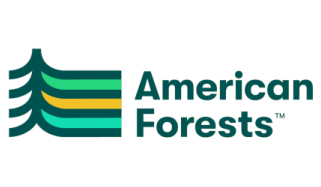

In [7]:
url = "https://logos-world.net/wp-content/uploads/2021/10/American-Forests-Logo.png"
response = requests.get(url)
logo = PILImage.open(BytesIO(response.content))

# typst shows it if we display as a matplotlib figure
plt.imshow(logo)
plt.axis("off")
plt.show()


In [8]:
# A table with details

Carbon projections

In [9]:
highlight_color = brand.color.secondary
brand_theme = theme(
    text=element_text(
        family=brand.typography.base.family,
        weight=brand.typography.base.weight,
        color=brand.color.foreground,
        size=14,
    )
)

In [10]:
# Apply typography and brand colors globally
plt.rcParams.update({
    "font.family": brand.typography.base.family,
    "font.weight": brand.typography.base.weight,
    "axes.titlesize": 14,
    "axes.titleweight": brand.typography.headings.weight,
    "axes.labelsize": 12,
    "axes.labelweight": brand.typography.base.weight,
    "text.color": brand.color.foreground,
    "axes.labelcolor": brand.color.foreground,
    "xtick.color": brand.color.foreground,
    "ytick.color": brand.color.foreground,
})

# Apply brand palette
sns.set_palette(list(brand.color.model_dump()["palette"].values()))

findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


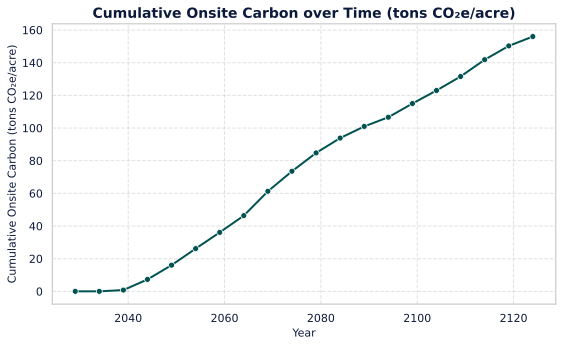

In [11]:
# cumulative onsite carbon over time
plt.figure(figsize=(8,5))
sns.lineplot(
    data=dfC,
    x="Year",
    y="ABLD_C_cumulative",
    marker="o",
    linewidth=2,
    color=brand.color.primary
)

plt.title(
    "Cumulative Onsite Carbon over Time (tons CO₂e/acre)",
    fontsize=14,
    weight="bold",
    color=brand.color.foreground
)
plt.xlabel("Year", fontsize=11)
plt.ylabel("Cumulative Onsite Carbon (tons CO₂e/acre)", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

Financial projections

In [12]:
summary = (
    df.groupby("Protocol")
      .agg(
          total_cu=("CU", "sum"),
          total_cus_sold=("CUs_Sold", "sum"),
          avg_credit_price=("CU_Credit_Price", "mean"),
          total_revenue=("Total_Revenue", "sum"),
          total_costs=("Total_Costs", "sum"),
          avg_net_revenue=("Net_Revenue", "mean")
      )
      .reset_index()
)

# summary.sort_values("avg_net_revenue", ascending=False).head()


In [13]:
year_summary = (
    df.groupby("Year", as_index=False)
      .agg(
          CUs_Sold=("CUs_Sold", "sum"),
          Avg_Credit_Price=("CU_Credit_Price", "mean"),
          Total_Revenue=("Total_Revenue", "sum"),
          Total_Costs=("Total_Costs", "sum"),
          Net_Revenue=("Net_Revenue", "sum")
      )
)

# year_summary


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


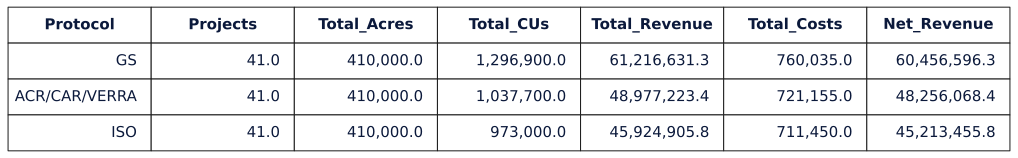

In [14]:
protocol_summary = (
    df.groupby("Protocol", as_index=False)
      .agg(
          Projects=("Project_acres", "count"),
          Total_Acres=("Project_acres", "sum"),
          Total_CUs=("CU", "sum"),
          Total_Revenue=("Total_Revenue", "sum"),
          Total_Costs=("Total_Costs", "sum"),
          Net_Revenue=("Net_Revenue", "sum")
      )
      .sort_values("Net_Revenue", ascending=False)
)
# # protocol_summary
# display(protocol_summary)


# format numbers with commas
protocol_summary_fmt = (
    protocol_summary
      .map(lambda x: f"{x:,.1f}" if isinstance(x, (int, float)) else x)
)

# --- Create the figure ---
fig, ax = plt.subplots(figsize=(12, 2))
ax.axis("off")

tbl = table(ax, protocol_summary_fmt.round(0).reset_index(drop=True), loc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(15)
tbl.scale(1.5, 3)

# make column names bold
for (row, col), cell in tbl.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')

# hide the row numbers / index
for (row, col), cell in tbl.get_celld().items():
    if col == -1:
        cell.visible_edges = ""
        cell.set_text_props(text="")

plt.show()


Charts

findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


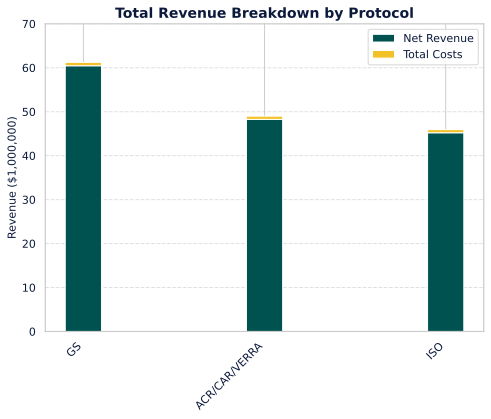

In [15]:
# sort by total revenue
protocol_summary = protocol_summary.sort_values("Total_Revenue", ascending=False)

plt.figure(figsize=(7,6))
bar_width = 0.2
x = range(len(protocol_summary))

# scale to millions
net_rev_million = protocol_summary["Net_Revenue"] / 1_000_000
costs_million = protocol_summary["Total_Costs"] / 1_000_000

# stacked bars
plt.bar(
    x,
    net_rev_million,
    width=bar_width,
    label="Net Revenue",
    color= brand.color.primary
)

plt.bar(
    x,
    costs_million,
    width=bar_width,
    bottom=net_rev_million,
    label="Total Costs",
    color=brand.color.secondary
)

plt.xticks(x, protocol_summary["Protocol"], rotation=45, ha="right")
plt.title("Total Revenue Breakdown by Protocol", fontsize=14, weight="bold")
plt.ylabel("Revenue ($1,000,000)", fontsize=11)

max_val = (protocol_summary["Total_Revenue"].max() / 1_000_000)
plt.yticks(range(0, int(max_val) + 10, 10))

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.


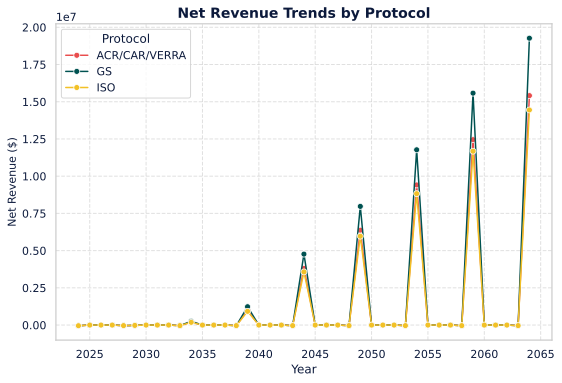

In [16]:
## Net Revenue by Protocol Over Years
sns.set_palette([
    brand.color.palette["orange"],
    brand.color.primary,
    brand.color.secondary
])

plt.figure(figsize=(8,5.5))
sns.lineplot(data=df, x="Year", y="Net_Revenue", hue="Protocol", marker="o")
plt.title("Net Revenue Trends by Protocol", fontsize=14, weight="bold")
# plt.xlabel("Year")
plt.ylabel("Net Revenue ($)", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [17]:
## Summary Table
summary = (
    df.groupby("Protocol")
      .agg(
          total_cus_sold=("CUs_Sold", "sum"),
          avg_credit_price=("CU_Credit_Price", "mean"),
          total_revenue=("Total_Revenue", "sum"),
          avg_net_revenue=("Net_Revenue", "mean"),
          total_costs=("Total_Costs", "sum")

      )
      .round(2)
)
# summary
